# Task 3 - Experience Analytics

# Task 3.1 - Aggregate, per customer, the following information:

• Average TCP retransmission

• Average RTT

• Handset type

• Average throughput

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import the dataset
df=pd.read_excel('telcom_data.xlsx')

In [5]:
#Convert spaces into underscore in column name of dataframe and Uppercase to lowercase
def new_columns(df):
    df.columns= [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [6]:
df = new_columns(df)

In [7]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

In [9]:
df1 =df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   duration                                  150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn                                    148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

We need to combine the total UL and Dl data and Create a new DataFrame

In [11]:
df1["tcp_retrans"] = df1["tcp_dl_retrans._vol_(bytes)"] + df1['tcp_ul_retrans._vol_(bytes)']
df1["avg_rtt"] = df1["avg_rtt_dl_(ms)"] + df1["avg_rtt_ul_(ms)"]
df1['avg_tp'] = df1["avg_bearer_tp_dl_(kbps)"] + df1["avg_bearer_tp_ul_(kbps)"]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 58 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   duration                                  150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn                                    148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

In [13]:
# Replace missing values and outliers with the mean or mode of the corresponding variable
df1.isnull().sum()

bearer_id                                        0
start                                            1
start_ms                                         1
end                                              1
end_ms                                           1
duration                                         1
imsi                                           570
msisdn                                        1066
imei                                           572
last_location_name                            1153
avg_rtt_dl_(ms)                              27829
avg_rtt_ul_(ms)                              27812
avg_bearer_tp_dl_(kbps)                          1
avg_bearer_tp_ul_(kbps)                          1
tcp_dl_retrans._vol_(bytes)                  88146
tcp_ul_retrans._vol_(bytes)                  96649
dl_tp_<_50_kbps_(%)                            754
50_kbps_<_dl_tp_<_250_kbps_(%)                 754
250_kbps_<_dl_tp_<_1_mbps_(%)                  754
dl_tp_>_1_mbps_(%)             

In [14]:
df1['tcp_retrans'].fillna(df1['tcp_retrans'].mean(), inplace=True)

df1['avg_rtt'].fillna(df1['avg_rtt'].mean(), inplace=True)

df1['avg_tp'].fillna(df1['avg_tp'].mean(), inplace=True)

df1['handset_type'].fillna(df1['handset_type'].mode()[0], inplace=True)

In [15]:
df1.isnull().sum()

bearer_id                                        0
start                                            1
start_ms                                         1
end                                              1
end_ms                                           1
duration                                         1
imsi                                           570
msisdn                                        1066
imei                                           572
last_location_name                            1153
avg_rtt_dl_(ms)                              27829
avg_rtt_ul_(ms)                              27812
avg_bearer_tp_dl_(kbps)                          1
avg_bearer_tp_ul_(kbps)                          1
tcp_dl_retrans._vol_(bytes)                  88146
tcp_ul_retrans._vol_(bytes)                  96649
dl_tp_<_50_kbps_(%)                            754
50_kbps_<_dl_tp_<_250_kbps_(%)                 754
250_kbps_<_dl_tp_<_1_mbps_(%)                  754
dl_tp_>_1_mbps_(%)             

In [16]:
# Group by customer (msisdn ) and calculate the average of each variable
agg_df = df1.groupby('msisdn').agg({
    'tcp_retrans': 'mean',
    'avg_rtt': 'mean',
    'handset_type': 'first',
    'avg_tp': 'mean'
}).reset_index()
print(agg_df)

              msisdn   tcp_retrans     avg_rtt  \
0       3.360100e+10  2.571697e+07   46.000000   
1       3.360100e+10  2.571697e+07   31.000000   
2       3.360100e+10  2.571697e+07  127.024885   
3       3.360101e+10  2.571697e+07   84.000000   
4       3.360101e+10  1.754390e+07   59.500000   
...              ...           ...         ...   
106851  3.379000e+10  2.180450e+05   52.000000   
106852  3.379000e+10  2.571697e+07   40.000000   
106853  3.197021e+12  2.571697e+07  127.024885   
106854  3.370000e+14  2.571697e+07  127.024885   
106855  8.823971e+14  2.571697e+07  127.024885   

                            handset_type   avg_tp  
0         Huawei P20 Lite Huawei Nova 3E     76.0  
1                 Apple iPhone 7 (A1778)     99.0  
2                              undefined     97.0  
3                Apple iPhone 5S (A1457)    248.0  
4                Apple iPhone Se (A1723)  28422.0  
...                                  ...      ...  
106851               Huawei Honor 9

In [19]:
agg_df.head(10).style.background_gradient(cmap = "Greens")

,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp
0,33601001722.000000,25716966.336391,46.000000,Huawei P20 Lite Huawei Nova 3E,76.000000
1,33601001754.000000,25716966.336391,31.000000,Apple iPhone 7 (A1778),99.000000
2,33601002511.000000,25716966.336391,127.024885,undefined,97.000000
3,33601007832.000000,25716966.336391,84.000000,Apple iPhone 5S (A1457),248.000000
4,33601008617.000000,17543899.168196,59.500000,Apple iPhone Se (A1723),28422.000000
5,33601010682.000000,25716966.336391,75.512443,Samsung Galaxy A8 (2018),3954.000000
6,33601011634.000000,12913599.168196,26.500000,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,21256.500000
7,33601011959.000000,25716966.336391,52.000000,Samsung Galaxy S8 Plus (Sm-G955F),1247.000000
8,33601014694.000000,25716966.336391,127.024885,undefined,94.500000
9,33601020306.000000,25716966.336391,62.000000,Apple iPhone X (A1865),146.000000


# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

a. TCP values in the dataset.

b. RTT values in the dataset.

c. Throughput values in the dataset.

In [20]:
# Compute the top, bottom, and most frequent values for TCP
top_tcp = df1['tcp_retrans'].nlargest(10)
bottom_tcp = df1['tcp_retrans'].nsmallest(10)
most_frequent_tcp = df1['tcp_retrans'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for RTT
top_rtt = df1['avg_rtt'].nlargest(10)
bottom_rtt = df1['avg_rtt'].nsmallest(10)
most_frequent_rtt = df1['avg_rtt'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for throughput
top_throughput = df1['avg_tp'].nlargest(10)
bottom_throughput = df1['avg_tp'].nsmallest(10)
most_frequent_throughput = df1['avg_tp'].value_counts().head(10)

# Print the results
print("*"*50)
print("Top TCP values:")
print(top_tcp)
print("\nBottom TCP values:")
print(bottom_tcp)
print("\nMost frequent TCP values:")
print(most_frequent_tcp)
print("*"*50)

print("*"*50)
print("\nTop RTT values:")
print(top_rtt)
print("\nBottom RTT values:")
print(bottom_rtt)
print("\nMost frequent RTT values:")
print(most_frequent_rtt)
print("*"*50)

print("*"*50)
print("\nTop throughput values:")
print(top_throughput)
print("\nBottom throughput values:")
print(bottom_throughput)
print("\nMost frequent throughput values:")
print(most_frequent_throughput)
print("*"*50)

**************************************************
Top TCP values:
34636     4.344116e+09
140797    4.301477e+09
77950     4.294432e+09
135677    4.291465e+09
3741      4.288121e+09
119667    4.275492e+09
39608     4.268647e+09
59011     4.261616e+09
76971     4.260174e+09
41182     4.254660e+09
Name: tcp_retrans, dtype: float64

Bottom TCP values:
143594     86.0
111100     97.0
18417     106.0
13142     108.0
97061     113.0
8794      128.0
99947     129.0
83214     134.0
95955     134.0
12849     143.0
Name: tcp_retrans, dtype: float64

Most frequent TCP values:
2.571697e+07    99530
2.660000e+03       29
5.320000e+03       24
6.650000e+03       20
3.990000e+03       19
7.980000e+03       14
1.873000e+03       13
2.648000e+03        9
1.596000e+04        9
1.064000e+04        8
Name: tcp_retrans, dtype: int64
**************************************************
**************************************************

Top RTT values:
30155     96924.0
29916     64641.0
17894     55812.0
596

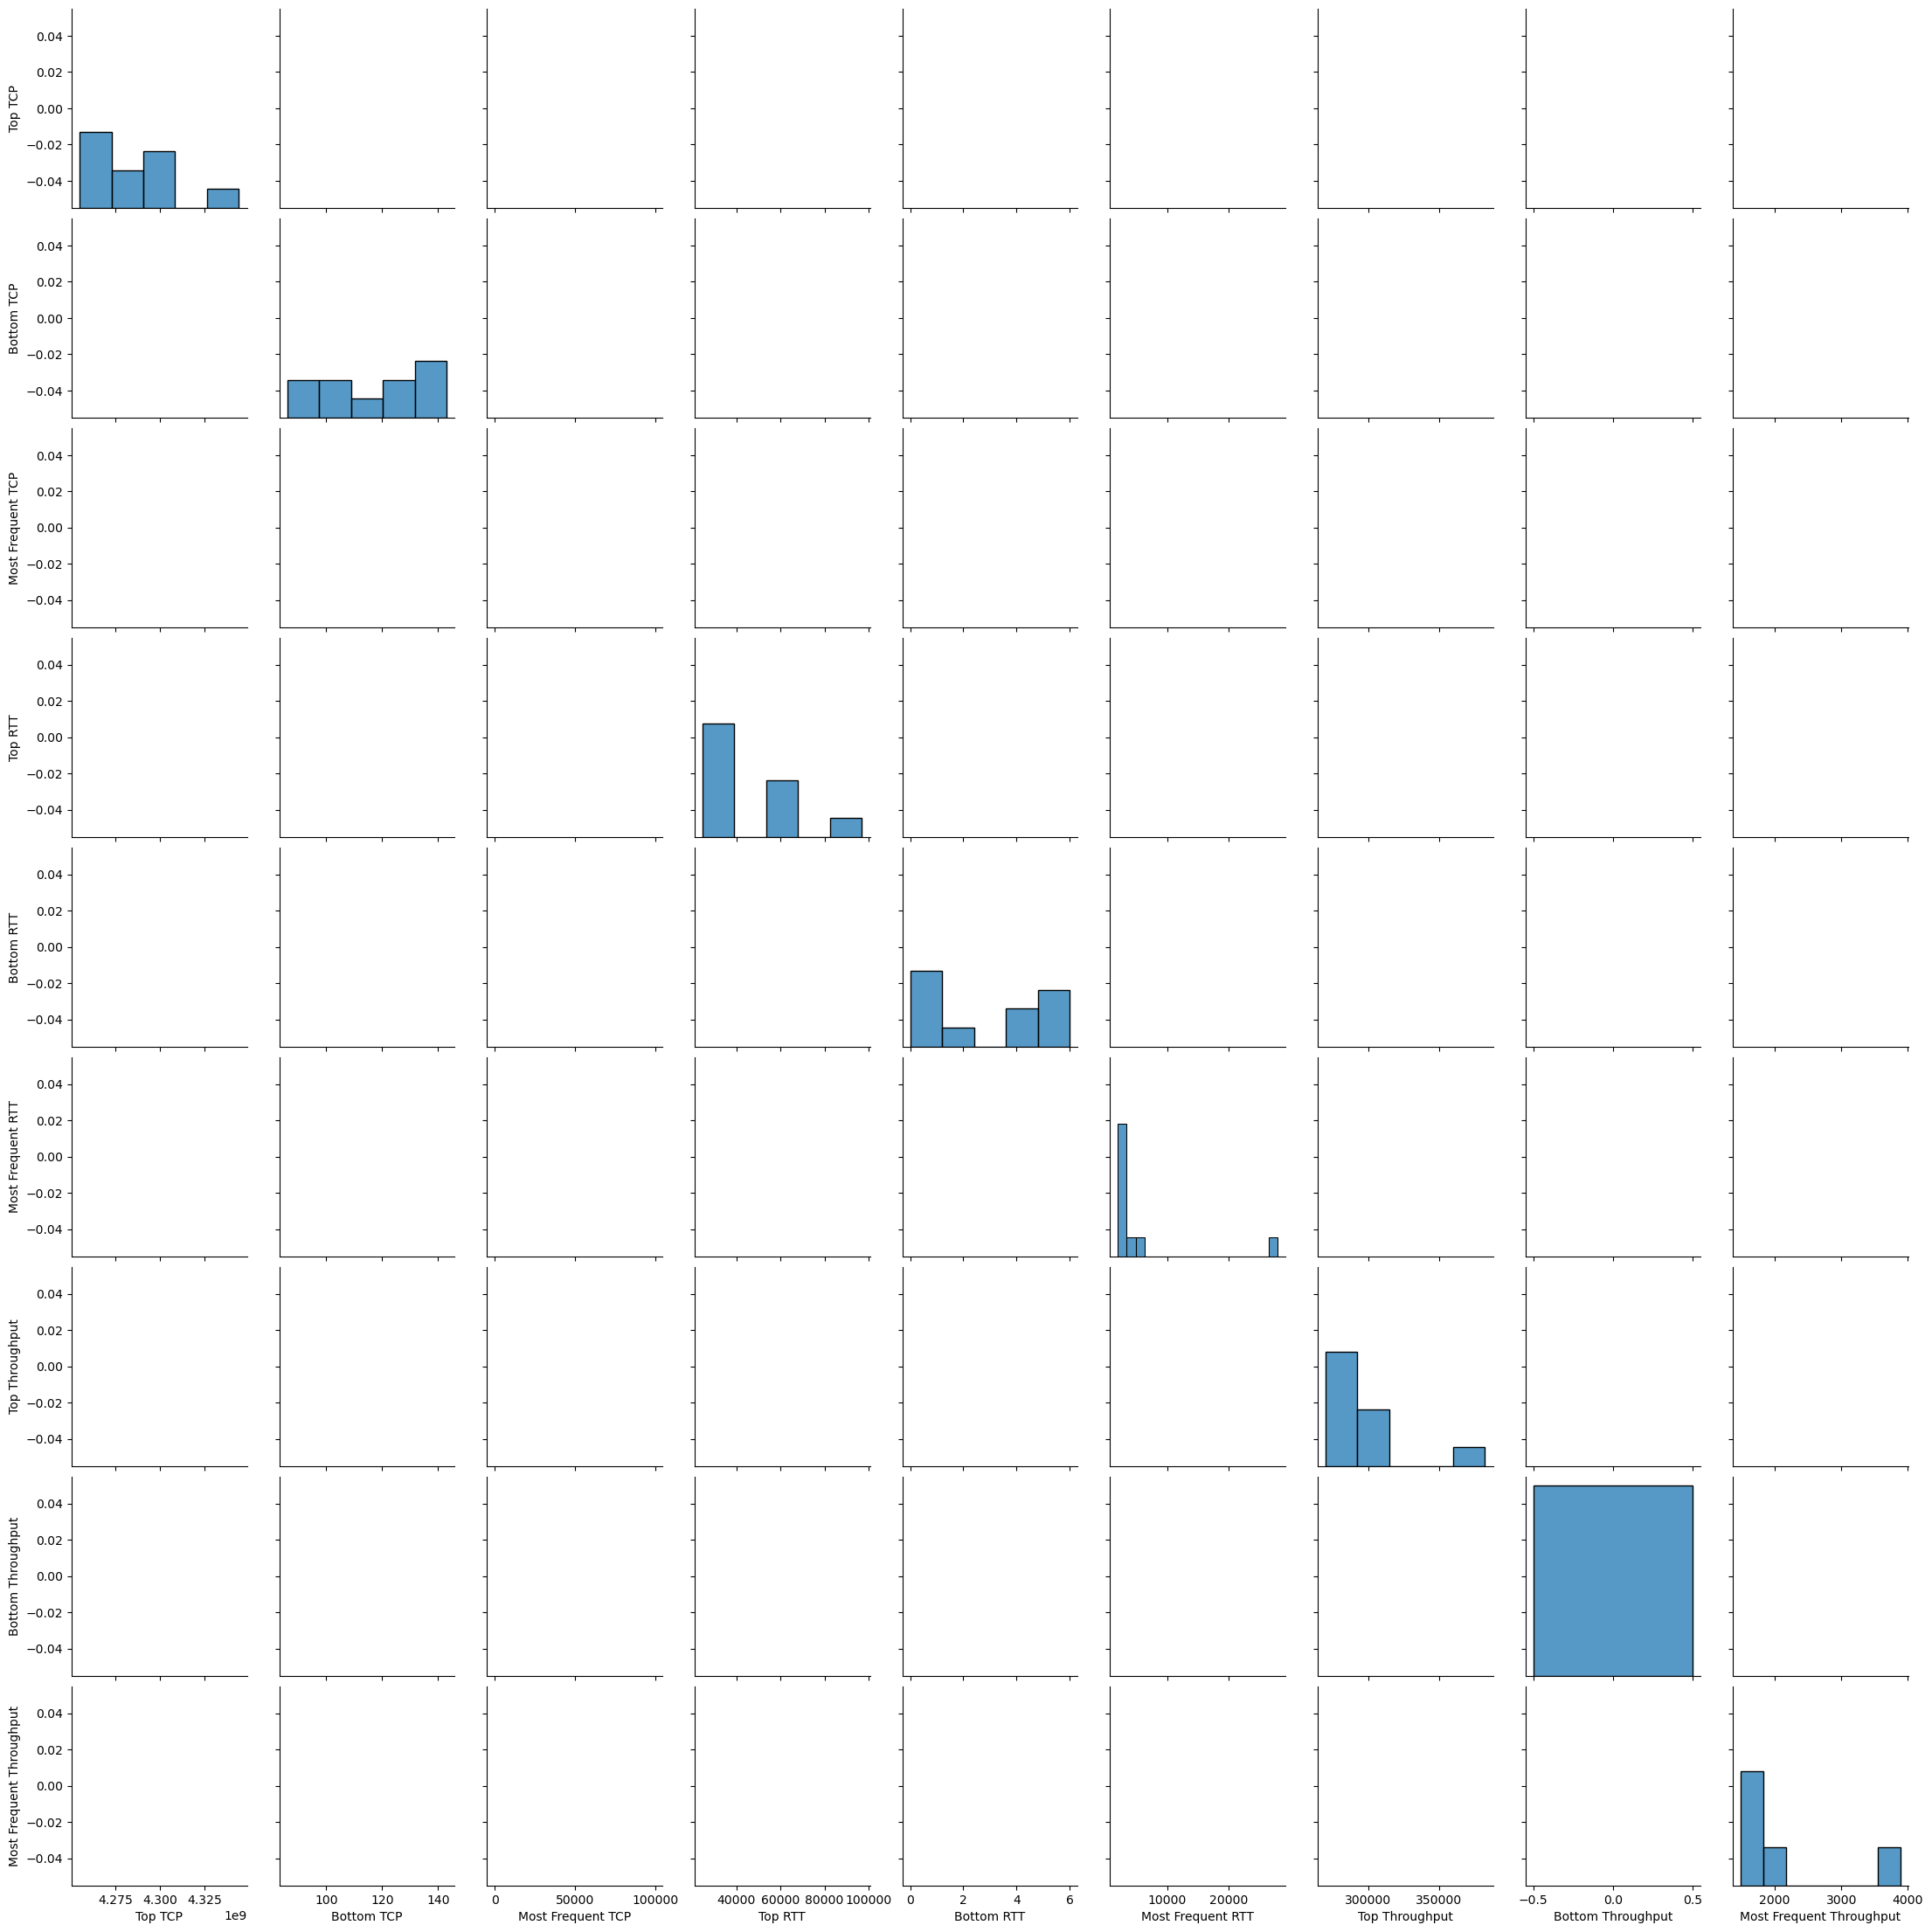

In [21]:
# Create a DataFrame with the top, bottom, and most frequent values
pairplot_df = pd.DataFrame({
    'Top TCP': top_tcp,
    'Bottom TCP': bottom_tcp,
    'Most Frequent TCP': most_frequent_tcp,
    'Top RTT': top_rtt,
    'Bottom RTT': bottom_rtt,
    'Most Frequent RTT': most_frequent_rtt,
    'Top Throughput': top_throughput,
    'Bottom Throughput': bottom_throughput,
    'Most Frequent Throughput': most_frequent_throughput
})

# Plot the pair plot
sns.pairplot(pairplot_df)
plt.show()

# Task 3.3 - Compute & report

In [22]:
# Compute the distribution of average throughput per handset type
throughput_distribution = df1.groupby('handset_type')['avg_tp'].mean()

# Compute the average TCP retransmission view per handset type
tcp_retransmission_view = df1.groupby('handset_type')['tcp_retrans'].mean()

# Print the results
print("Distribution of Average Throughput per Handset Type:")
print(throughput_distribution)
print("\nAverage TCP Retransmission View per Handset Type:")
print(tcp_retransmission_view)

Distribution of Average Throughput per Handset Type:
handset_type
A-Link Telecom I. Cubot A5                                                             23510.000000
A-Link Telecom I. Cubot Note Plus                                                       6699.000000
A-Link Telecom I. Cubot Note S                                                          8937.000000
A-Link Telecom I. Cubot Nova                                                           56217.000000
A-Link Telecom I. Cubot Power                                                          69468.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       58.000000
Zyxel Communicat. Lte7460                                                              61956.000000
Zyxel Communicat. Sbg3600                                                              97351.000000
Zyxel Communicat. Zyxel Wah7706   

# Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [24]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

In [25]:
from sklearn.preprocessing import StandardScaler
# Normalize the experience  metrics
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df1[['avg_tp', 'tcp_retrans', 'avg_rtt']]), columns=['avg_tp', 'tcp_retrans', 'avg_rtt'], index=df.index)
normalized_df

,avg_tp,tcp_retrans,avg_rtt
0,0.000175,0.00592,0.000485
1,0.000110,0.00592,0.000722
2,0.000039,0.00592,0.001311
3,0.000230,0.00592,0.001311
4,0.000039,0.00592,0.001311
...,...,...,...
149996,0.000306,0.00592,0.000330
149997,0.000201,0.00592,0.000299
149998,0.000235,0.00592,0.000506
149999,0.000186,0.00592,0.000433


In [26]:
# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
df1['cluster'] = kmeans.fit_predict(normalized_df)

# Interpret the clusters
cluster_means = df1.groupby('cluster')[['avg_tp', 'tcp_retrans','avg_rtt']].mean()
print("Cluster Means:")
print(cluster_means)

experience_metrics_with_cluster = agg_df.copy()
experience_metrics_with_cluster['clusters'] = df1['cluster']


Cluster Means:
               avg_tp   tcp_retrans     avg_rtt
cluster                                        
0         2109.464269  2.297046e+07  131.889098
1        95983.031974  9.325305e+07   97.338806
2        40960.089852  1.728938e+07  117.120843


In [27]:
print(experience_metrics_with_cluster['clusters'])

0         0
1         0
2         0
3         0
4         0
         ..
106851    0
106852    0
106853    0
106854    0
106855    0
Name: clusters, Length: 106856, dtype: int32


Cluster Means:
               avg_tp   tcp_retrans     avg_rtt
cluster                                        
0         2139.949232  2.294706e+07  131.874442
1        96506.787331  9.466022e+07   97.335181
2        41220.896530  1.736222e+07  116.986140


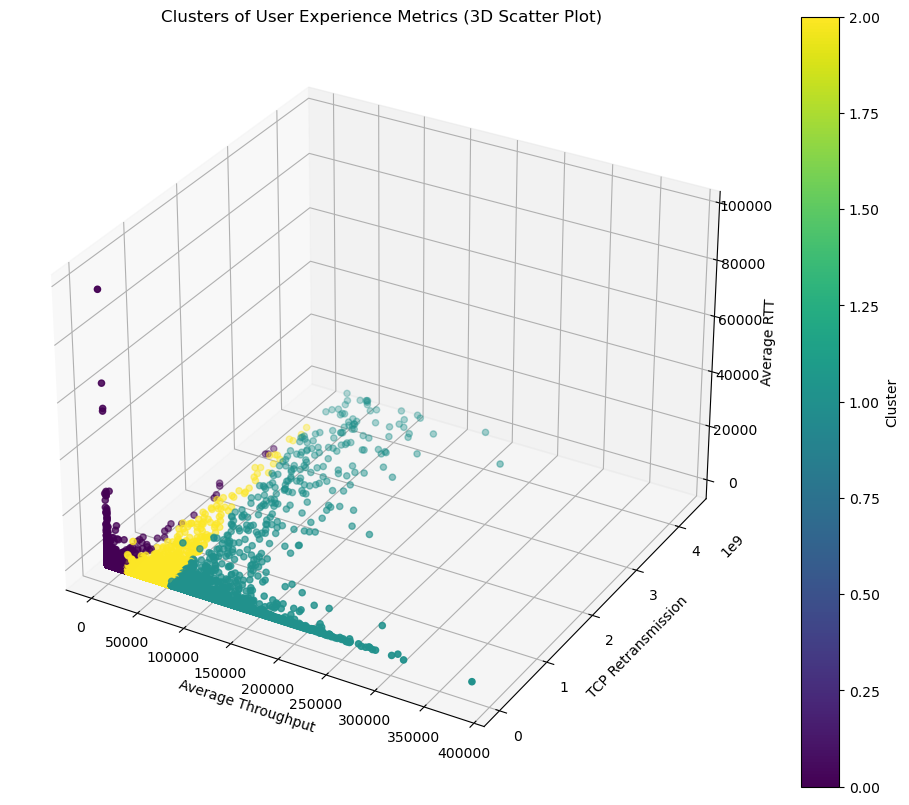

In [28]:
from mpl_toolkits.mplot3d import Axes3D

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
df1['cluster'] = kmeans.fit_predict(normalized_df)

# Interpret the clusters
cluster_means = df1.groupby('cluster')[['avg_tp', 'tcp_retrans', 'avg_rtt']].mean()
print("Cluster Means:")
print(cluster_means)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x = df1['avg_tp']
y = df1['tcp_retrans']
z = df1['avg_rtt']
c = df1['cluster']

scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=20)

ax.set_xlabel('Average Throughput')
ax.set_ylabel('TCP Retransmission')
ax.set_zlabel('Average RTT')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
plt.title('Clusters of User Experience Metrics (3D Scatter Plot)')
plt.show()

experience_metrics_with_cluster = agg_df.copy()
experience_metrics_with_cluster['clusters'] = df1['cluster']
